# Anscombe's Quartet — Analysis

Four datasets with nearly **identical** summary statistics that look completely different when plotted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

df = pd.read_csv('anscombe_quartet.tsv', sep='\t')
datasets = {name: grp[['x', 'y']].reset_index(drop=True)
            for name, grp in df.groupby('dataset')}

# One distinct color per dataset, used consistently across all plots
COLORS = {'I': '#4C72B0', 'II': '#DD8452', 'III': '#55A868', 'IV': '#C44E52'}

df.head()

,dataset,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


## Descriptive Statistics

In [2]:
rows = []
for name, d in sorted(datasets.items()):
    r = np.corrcoef(d['x'], d['y'])[0, 1]
    rows.append({
        'Dataset': name,
        'Mean x': round(d['x'].mean(), 2),
        'Std x':  round(d['x'].std(ddof=1), 2),
        'Min x':  d['x'].min(),
        'Max x':  d['x'].max(),
        'Mean y': round(d['y'].mean(), 2),
        'Std y':  round(d['y'].std(ddof=1), 2),
        'Min y':  d['y'].min(),
        'Max y':  d['y'].max(),
        'Pearson r': round(r, 4),
    })

stats_df = pd.DataFrame(rows).set_index('Dataset')
stats_df

,Mean x,Std x,Min x,Max x,Mean y,Std y,Min y,Max y,Pearson r
Dataset,,,,,,,,,
I,9.0,3.32,4,14,7.5,2.03,4.26,10.84,0.8164
II,9.0,3.32,4,14,7.5,2.03,3.10,9.26,0.8162
III,9.0,3.32,4,14,7.5,2.03,5.39,12.74,0.8163
IV,9.0,3.32,8,19,7.5,2.03,5.25,12.50,0.8165


## Plot 1 — 2×2 Scatter Grid

Raw scatter plots for each dataset. Despite identical statistics, the shapes are entirely different.

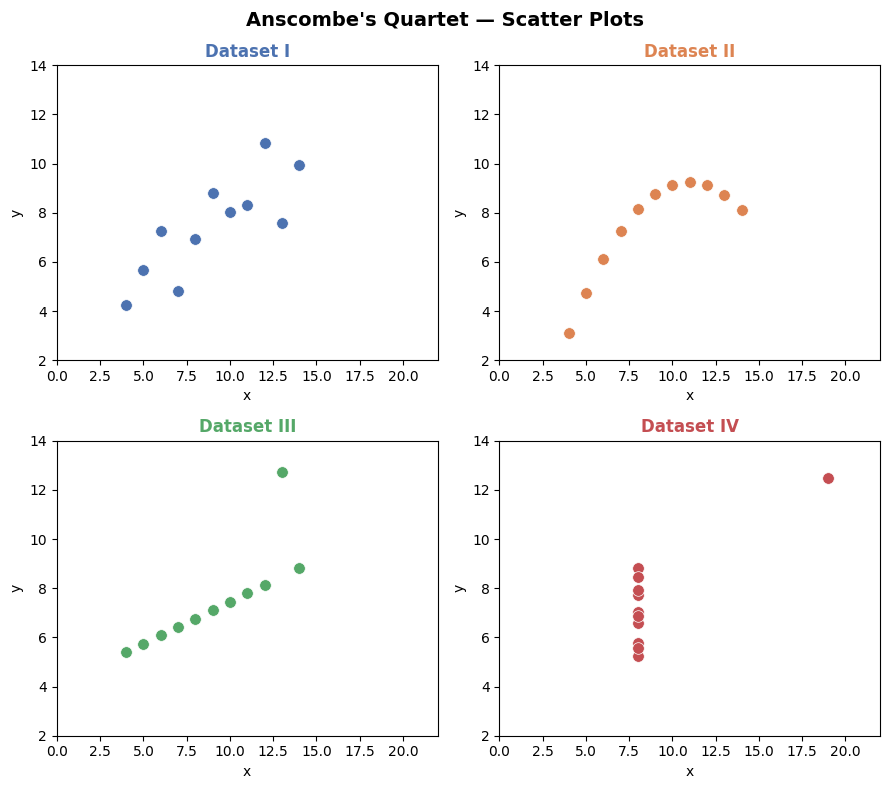

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(9, 8), sharex=False, sharey=False)
fig.suptitle("Anscombe's Quartet — Scatter Plots", fontsize=14, fontweight='bold')

for ax, (name, d) in zip(axes.flat, sorted(datasets.items())):
    ax.scatter(d['x'], d['y'], color=COLORS[name], edgecolors='white', s=70, linewidths=0.5)
    ax.set_title(f'Dataset {name}', fontweight='bold', color=COLORS[name])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, 22)
    ax.set_ylim(2, 14)

plt.tight_layout()
plt.savefig('plot1_scatter.png', dpi=120, bbox_inches='tight')
plt.show()

## Plot 2 — Scatter Plots with Fitted Regression Lines

Each panel overlays the OLS regression line. All four share virtually the same line (y ≈ 3 + 0.5x),
yet the line is only an appropriate model for Dataset I.

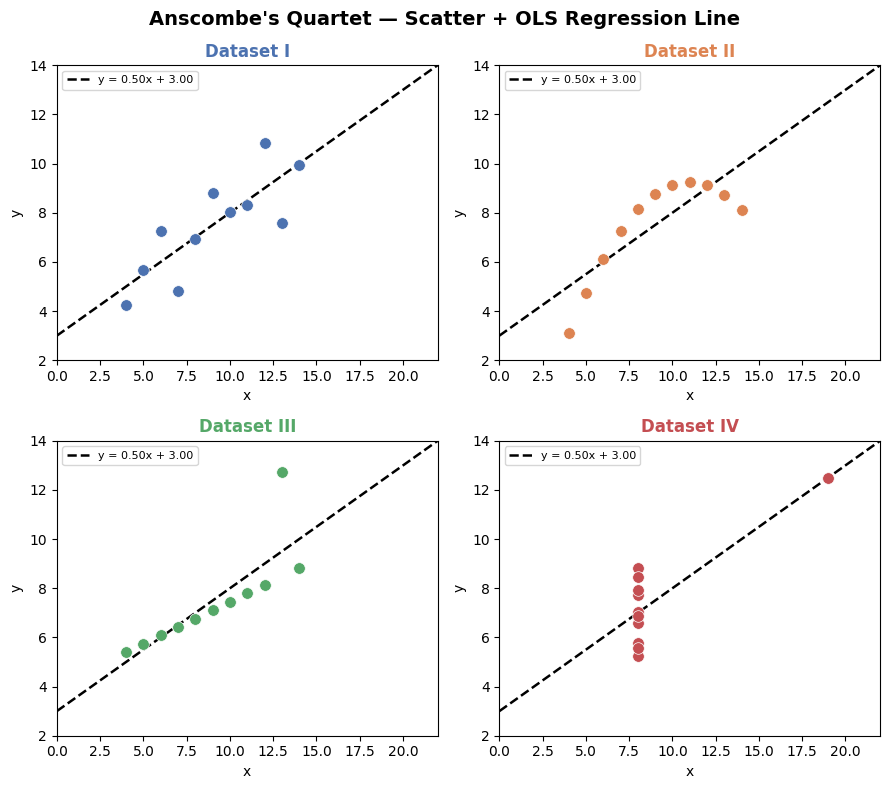

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(9, 8))
fig.suptitle("Anscombe's Quartet — Scatter + OLS Regression Line", fontsize=14, fontweight='bold')

x_line = np.linspace(0, 22, 100)

for ax, (name, d) in zip(axes.flat, sorted(datasets.items())):
    m, b = np.polyfit(d['x'], d['y'], 1)
    color = COLORS[name]
    ax.scatter(d['x'], d['y'], color=color, edgecolors='white', s=70, linewidths=0.5, zorder=3)
    ax.plot(x_line, m * x_line + b, color='black', linewidth=1.8,
            linestyle='--', label=f'y = {m:.2f}x + {b:.2f}')
    ax.set_title(f'Dataset {name}', fontweight='bold', color=color)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, 22)
    ax.set_ylim(2, 14)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.savefig('plot2_regression.png', dpi=120, bbox_inches='tight')
plt.show()

## Plot 3 — Residual Plots

Residuals (y − ŷ) vs. fitted values. Patterns here expose model misfit:
- **I**: random scatter — linear model fits well
- **II**: curved pattern — quadratic relationship
- **III**: one extreme outlier drives the residuals
- **IV**: degenerate — all x at one value except a single point

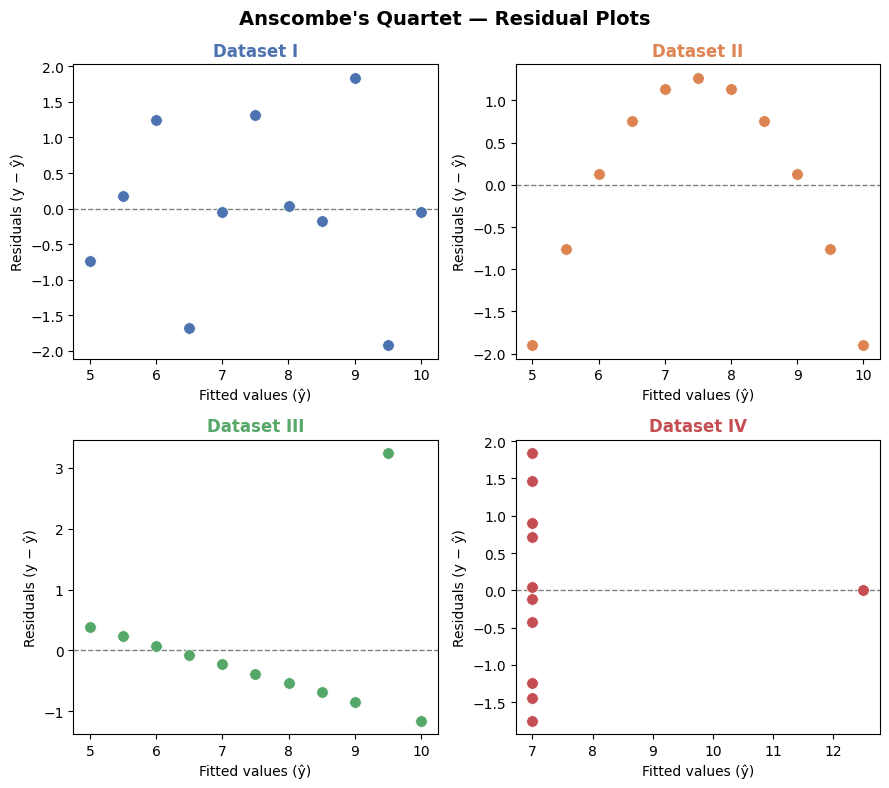

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(9, 8))
fig.suptitle("Anscombe's Quartet — Residual Plots", fontsize=14, fontweight='bold')

for ax, (name, d) in zip(axes.flat, sorted(datasets.items())):
    m, b = np.polyfit(d['x'], d['y'], 1)
    y_hat = m * d['x'] + b
    residuals = d['y'] - y_hat
    color = COLORS[name]
    ax.scatter(y_hat, residuals, color=color, edgecolors='white', s=70, linewidths=0.5, zorder=3)
    ax.axhline(0, color='gray', linewidth=1, linestyle='--')
    ax.set_title(f'Dataset {name}', fontweight='bold', color=color)
    ax.set_xlabel('Fitted values (ŷ)')
    ax.set_ylabel('Residuals (y − ŷ)')

plt.tight_layout()
plt.savefig('plot3_residuals.png', dpi=120, bbox_inches='tight')
plt.show()

## Plot 4 — Side-by-Side Box Plots

Box plots of x and y values per dataset. The near-identical distributions underscore why
summary statistics alone are insufficient to understand data.

/tmp/ipykernel_40713/1941124865.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, labels=labels, patch_artist=True)
/tmp/ipykernel_40713/1941124865.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, labels=labels, patch_artist=True)


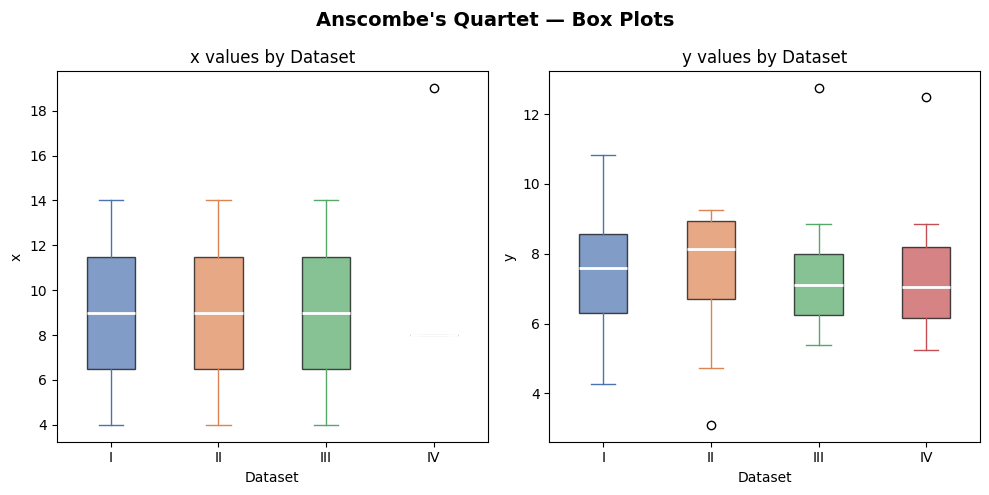

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Anscombe's Quartet — Box Plots", fontsize=14, fontweight='bold')

names = sorted(datasets.keys())
palette = [COLORS[n] for n in names]

def color_boxplot(ax, data, labels, colors):
    bp = ax.boxplot(data, labels=labels, patch_artist=True)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    for element in ['whiskers', 'caps', 'fliers']:
        for item, color in zip(
            [bp[element][i*2:i*2+2] for i in range(len(colors))], colors
        ):
            for line in item:
                line.set_color(color)
    for median in bp['medians']:
        median.set_color('white')
        median.set_linewidth(2)

color_boxplot(ax1, [datasets[n]['x'] for n in names], names, palette)
ax1.set_title('x values by Dataset')
ax1.set_xlabel('Dataset')
ax1.set_ylabel('x')

color_boxplot(ax2, [datasets[n]['y'] for n in names], names, palette)
ax2.set_title('y values by Dataset')
ax2.set_xlabel('Dataset')
ax2.set_ylabel('y')

plt.tight_layout()
plt.savefig('plot4_boxplots.png', dpi=120, bbox_inches='tight')
plt.show()